In [2]:
import os
import librosa
import json
import numpy as np
from tqdm import tqdm
import pandas as pd
import torchaudio

In [2]:
vggsound_wav_path = "/blob/v-yuancwang/DiffAudioImg/VGGSound/data/vggsound/wav"
vggsound_mel_path = "/blob/v-yuancwang/DiffAudioImg/VGGSound/data/vggsound/mel"
vggsound_mels = os.listdir(vggsound_mel_path)
vggsound_wavs = os.listdir(vggsound_wav_path)

In [ ]:
# for wav_id in ac_train_wavs[:5]:
#     wav, sr = librosa.load(os.path.join(ac_train_wav_path, wav_id), sr=16000)
#     print(wav)
#     print(torchaudio.info(os.path.join(ac_train_wav_path, wav_id)))

In [3]:
vggsound_mels.sort()
vggsound_wavs.sort()
print(len(vggsound_mels), len(vggsound_wavs))

177045 177056


In [4]:
total_number = 0
for mel_path in tqdm(vggsound_mels[:]):
    mel = np.load(os.path.join(vggsound_mel_path, mel_path))
    if mel.shape[1] < 624:
        mel = np.pad(mel, ((0, 0), (0, 624 - mel.shape[1])), 'wrap')
        np.save(os.path.join(vggsound_mel_path, mel_path), mel)
        total_number += 1
total_number

100%|██████████| 177045/177045 [02:40<00:00, 1102.03it/s]


0

In [5]:
vggsound_mels[:5]

['---g-f_I2yQ_1000_11000.npy',
 '--0PQM4-hqg_30000_40000.npy',
 '--56QUhyDQM_185000_195000.npy',
 '--8puiAGLhs_30000_40000.npy',
 '--96EN9NUQM_242000_252000.npy']

In [10]:
vgg_df = pd.read_csv("/home/v-yuancwang/AUDIT_v2/VGGSound/data/vggsound.csv", header=None)
id_caption_dict = {}
for wav_id, start_time, caption in zip(vgg_df[0], vgg_df[1], vgg_df[2]):
    id_caption_dict[wav_id + '_' + str(start_time*1000) + '_' + str((start_time+10)*1000)] = caption

In [11]:
vggsound = []
for mel_path in tqdm(vggsound_mels[:]):
    vggsound.append({"mel": os.path.join(vggsound_mel_path, mel_path),
                    "caption": id_caption_dict[mel_path.replace(".npy", "")]})
print(len(vggsound))
with open("/home/v-yuancwang/AUDIT_v2/medata_infos/vggsound.json", "w") as f:
    json.dump(vggsound, f)

100%|██████████| 177045/177045 [00:00<00:00, 433489.01it/s]


177045


In [4]:
import matplotlib.pyplot as plt
from IPython.display import Audio

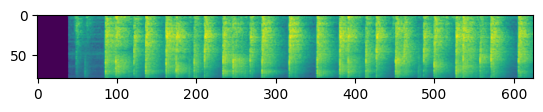

In [9]:
mel_path = "/blob/v-yuancwang/DiffAudioImg/VGGSound/data/vggsound/mel/-6AWljgt55M_509000_519000.npy"
test_mel = np.load(mel_path)
plt.imshow(test_mel)

In [10]:
wav_path = mel_path.replace("/mel/", "/wav/").replace(".npy", ".wav")
Audio(wav_path)